<a href="https://colab.research.google.com/github/robajo12/ET570/blob/master/Python/Advanced_python/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
adv_df= pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')
adv_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [96]:
adv_df['Male'].unique()

array([0, 1])

In [97]:
adv_df['Clicked on Ad'].unique()

array([0, 1])

In [98]:
adv_df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [99]:
adv_df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [110]:
# dropping unnecessary columns
adv_df.drop(columns=['Age','City', 'Ad Topic Line', 'Country','Timestamp',inplace = True])


SyntaxError: ignored

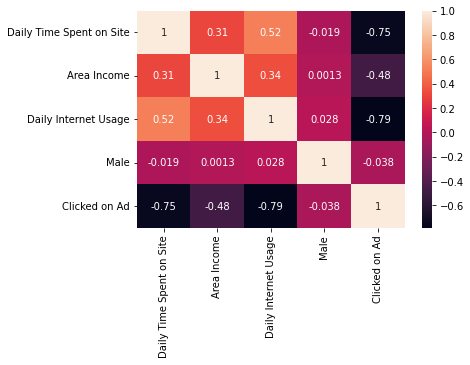

In [76]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)


In [101]:
X = df1[['Daily Time Spent on Site', 'Area Income',
       'Daily Internet Usage', 'Male']]
X.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male
0,68.95,61833.90,256.09,0
1,80.23,68441.85,193.77,1
2,69.47,59785.94,236.50,0
3,74.15,54806.18,245.89,1
4,68.37,73889.99,225.58,0


In [102]:
y=df1[['Clicked on Ad']]
y.head()


,Clicked on Ad
0,0
1,0
2,0
3,0
4,0


## Building the model 


-- Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
x_train.shape, X_test.shape, y_train.shape, y_test.shape


((750, 5), (250, 4), (750, 1), (250, 1))

In [105]:
logReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_predict = logReg.predict(x_test)
y_test.values[0:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [107]:
y_predict[0:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [108]:
logReg.score(x_test,y_test)

0.496

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.496

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[128,  11],
       [ 17,  94]])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       139
           1       0.90      0.85      0.87       111

    accuracy                           0.89       250
   macro avg       0.89      0.88      0.89       250
weighted avg       0.89      0.89      0.89       250



In [43]:
cm = confusion_matrix(y_test,y_predict)

Text(0.5, 15.0, 'predicted value')

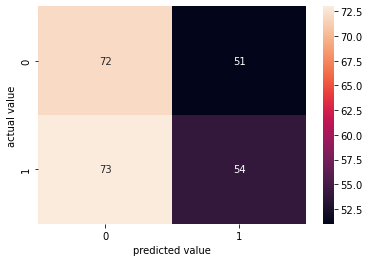

In [44]:
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')

-- KNN 

In [45]:
# Import StandardScaler from sklearn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler as scaler
scaler = StandardScaler()

# Fit the StandardScaler to the features
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [47]:
# Import KNeighborsClassifier frrom sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [48]:
y_pred = knn.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[73, 50],
       [61, 66]])

In [51]:
score = knn.score(x_test,y_test)
score

0.556

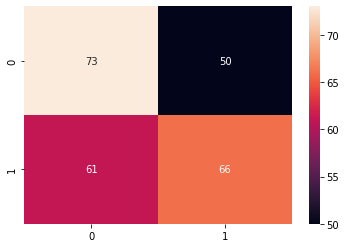

In [52]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.59      0.57       123
           1       0.57      0.52      0.54       127

    accuracy                           0.56       250
   macro avg       0.56      0.56      0.56       250
weighted avg       0.56      0.56      0.56       250



In [57]:
# k value and accuracy
from sklearn import metrics
score = []
for i in range(1,25):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_predict))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

In [58]:
print(score)

[0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504, 0.504]
